In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd



In [7]:

# https://gadm.org/
# https://gadm.org/download_country.html
# Load the GeoJSON file (Level 1 - regions) 
geojson_path = 'C:\\Users\\JuanCarlosSaraviaDra\\Downloads\\gadm41_PER_1.json\\gadm41_PER_1.json'
peru_regions = gpd.read_file(geojson_path) # This is a data frame








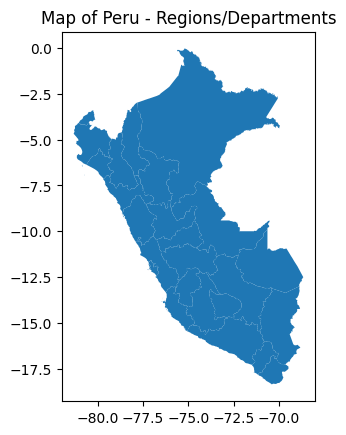

In [2]:
# Plot the map
peru_regions.plot()
plt.title('Map of Peru')
plt.show()


In [4]:
# Checking if the map is a data frame
peru_regions.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,PER.1_1,PER,Peru,Amazonas,NA,NA,Región,Region,01,PE.AM,PE-AMA,"MULTIPOLYGON (((-77.7803 -6.942, -77.7842 -6.9..."
1,PER.2_1,PER,Peru,Ancash,Ancachs,NA,Región,Region,02,PE.AN,PE-ANC,"MULTIPOLYGON (((-77.2862 -10.5582, -77.292 -10..."
2,PER.3_1,PER,Peru,Apurímac,Apuromac,NA,Región,Region,03,PE.AP,NA,"MULTIPOLYGON (((-73.2403 -13.4763, -73.2363 -1..."
3,PER.4_1,PER,Peru,Arequipa,NA,NA,Región,Region,04,PE.AR,PE-ARE,"MULTIPOLYGON (((-71.8424 -17.1726, -71.8482 -1..."
4,PER.5_1,PER,Peru,Ayacucho,NA,NA,Región,Region,05,PE.AY,PE-AYA,"MULTIPOLYGON (((-73.2933 -15.3921, -73.3067 -1..."


In [9]:
# Data de ejemplo

url = "https://raw.githubusercontent.com/jsaraviadrago/Peru-julbol/main/Peruvian_football_map/data_equipos_vf1.csv"

data_equipos_vf1 = pd.read_csv(url)
data_equipos_vf1.head()

,Equipo,Ciudad,Estadio,Liga,region,Año_fundacion,Años_cantidad,combined
0,AD Cafetalera Alto Amazonas,Cajaruro,Estadio Alto Amazonas,Copa Perú,Amazonas,1998.0,26.0,AD Cafetalera Alto Amazonas-Cajaruro-Amazonas
1,Agricobank San Lorenzo,Bagua,Estadio Manuel Mesones,Copa Perú,Amazonas,1963.0,61.0,Agricobank San Lorenzo-Bagua-Amazonas
2,Alfonso Ugarte,La Peca,Estadio Manuel Mesones,Copa Perú,Amazonas,1959.0,65.0,Alfonso Ugarte-La Peca-Amazonas
3,Alianza Polvorín,Aramango,Estadio Municipal de Aramango,Copa Perú,Amazonas,NaN,NaN,Alianza Polvorín-Aramango-Amazonas
4,Bagua Grande FC,Bagua Grande,Estadio San Luis,Copa Perú,Amazonas,2013.0,11.0,Bagua Grande FC-Bagua Grande-Amazonas


In [10]:
# Agregar la data para 

data_equipos_region = data_equipos_vf1.groupby(['region']).agg(
    Equipos = ('region', 'count')).reset_index()

data_equipos_region.head()


,region,Equipos
0,Amazonas,19
1,Apurímac,15
2,Arequipa,80
3,Ayacucho,26
4,Cajamarca,34


In [ ]:
# Merge tables
data_final = pd.merge(peru_regions, data_equipos_region, how='inner', left_on= 'NAME_1', right_on='region').reset_index()

data_final.head()

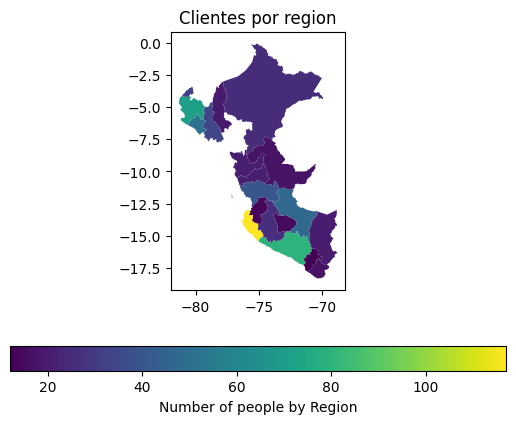

In [21]:
# Plot the data, with color intensity based on the number of cases
data_final.plot(column='Equipos', cmap='viridis', legend=True,
            legend_kwds={'label': "Number of people by Region",
                         'orientation': "horizontal"})

plt.title('Clientes por region')
plt.show()